# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [89]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [90]:
visa = pd.read_csv("EasyVisa.csv")

In [91]:
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

In [92]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [93]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [94]:
data.shape

(25480, 12)

There are 25,480 observations and 12 columns in the dataset

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 9 objects, and 3 numeric types in the data set.

There are no null values

In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [97]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [98]:
data.duplicated().sum()

0

There are no duplicate values and no null values in the data set

In [99]:
data = data.drop(["case_id"], axis = 1)

In [100]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [101]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
  
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    ) 

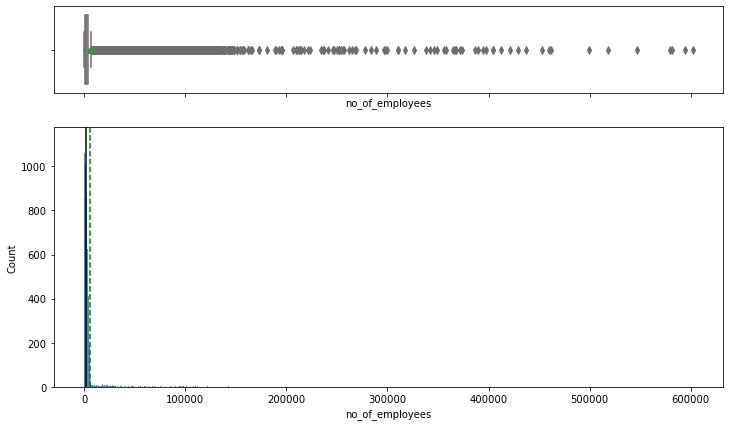

In [102]:
histogram_boxplot(data,'no_of_employees')

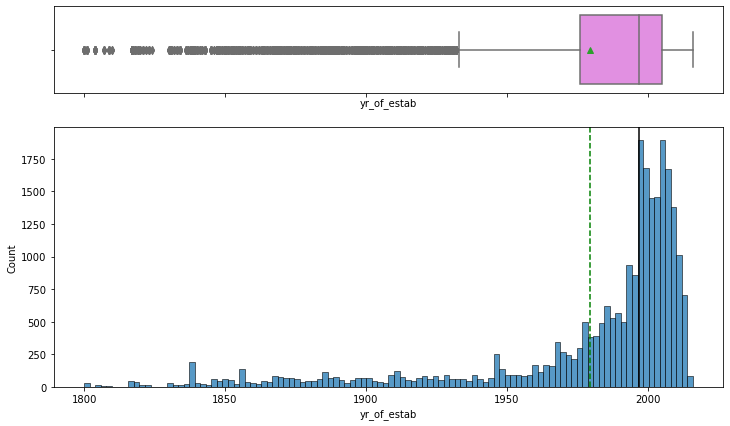

In [103]:
histogram_boxplot (data,"yr_of_estab")

Observation: The data is skewed to the right.

There was a spike in establishment of companies from the late 19th century till the early 2000s

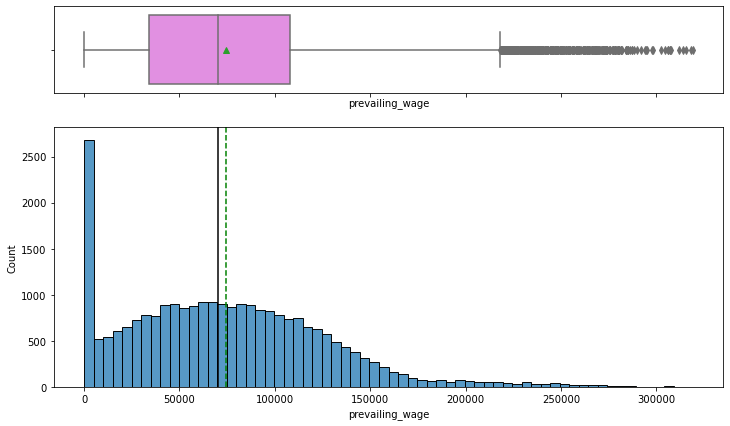

In [104]:
histogram_boxplot (data,"prevailing_wage")

There are many outliers in the data

The data is a bit right-skewed

The 3rd quatile is about 110,000, indicating that 75% of wages is under 110,000.

In [105]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show() 

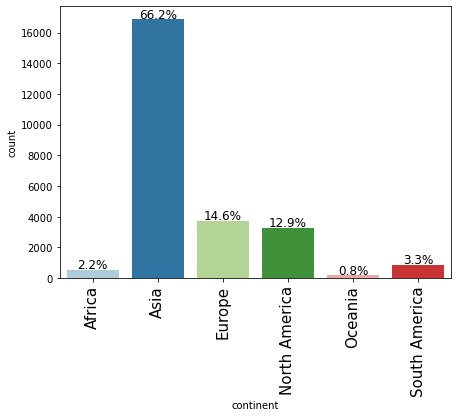

In [106]:
labeled_barplot(data,"continent",perc=True)

Majority of work visa applications are from asia, followed by europe and north america.

Over 93% of applications come from Asia, Europe and N.America

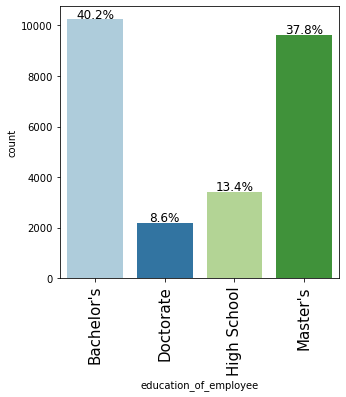

In [107]:
labeled_barplot(data,"education_of_employee",perc=True)

Majority of employees have bachelor's degrees, followed by masters.

Doctorate and High school certificate holders make up only 22% of employees.

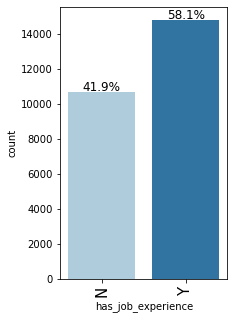

In [108]:
labeled_barplot(data,"has_job_experience",perc=True)

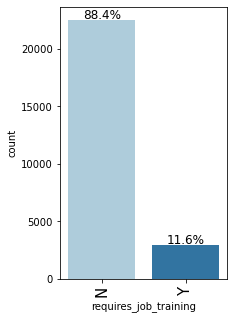

In [109]:
labeled_barplot(data,"requires_job_training",perc=True)

Only 11.6% of employees require job training.

Most employees have received the relevant trainings from their home countries that qualified them for the jobs

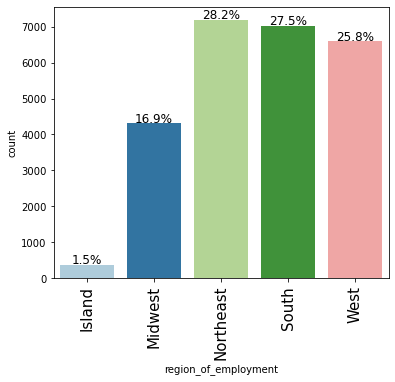

In [110]:
labeled_barplot(data,"region_of_employment",perc=True)

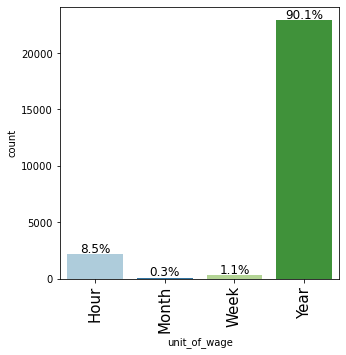

In [111]:
labeled_barplot(data,"unit_of_wage",perc=True)

90% of wages is represented by annual pay.

Data engineering is required to make all the wages the same unit for the purpose of analysis.

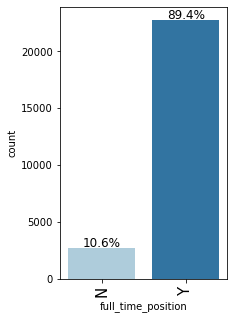

In [112]:
labeled_barplot(data,"full_time_position",perc=True)

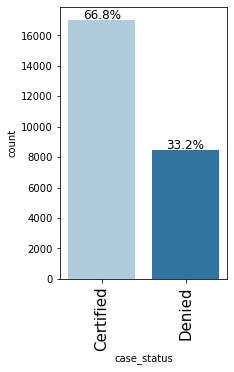

In [113]:
labeled_barplot(data,"case_status",perc=True)

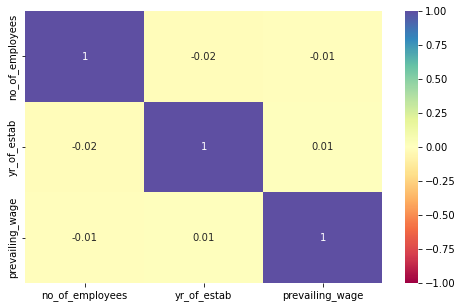

In [114]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

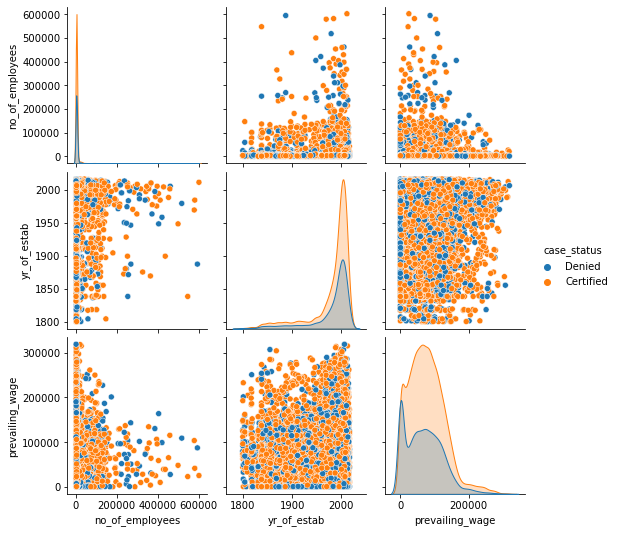

In [115]:
sns.pairplot(data=data,hue="case_status")
plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [116]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

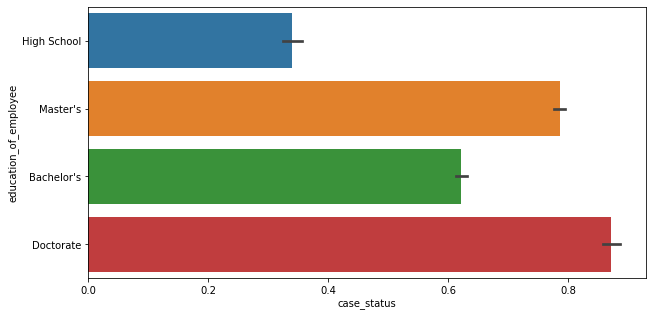

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x="case_status",
    y="education_of_employee",
)
plt.show()

The highier the level of education, the highier the probability of getting a visa certified

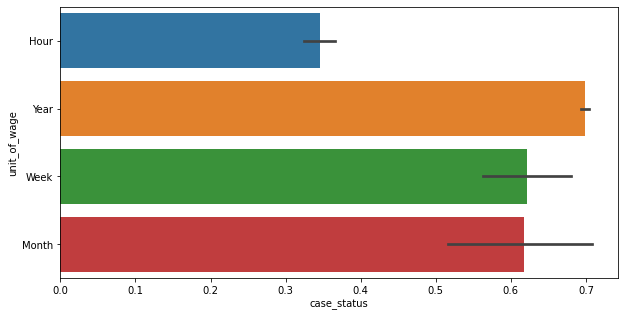

In [60]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x="case_status",
    y="unit_of_wage",
)
plt.show()

Those with annual unit of wage are most likely to be granted visas

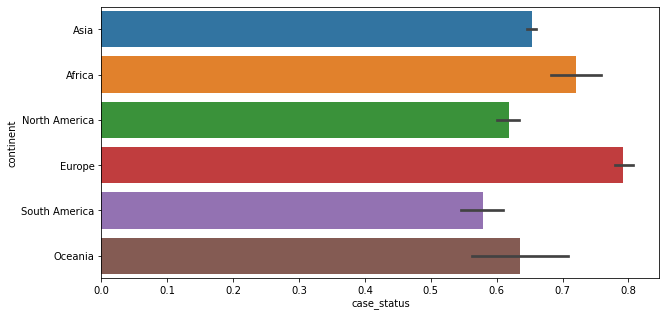

In [61]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x="case_status",
    y="continent",
)
plt.show()

Europe has the highiest number of visa certifications, followed by africa

the lowest is south america

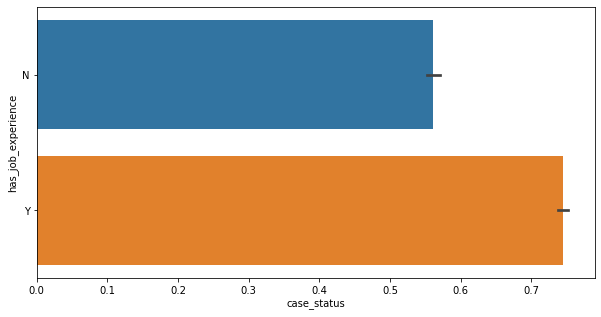

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x="case_status",
    y="has_job_experience",
)
plt.show()

Applicants with job experience have a highier chance of having their visas certified

<function matplotlib.pyplot.show(close=None, block=None)>

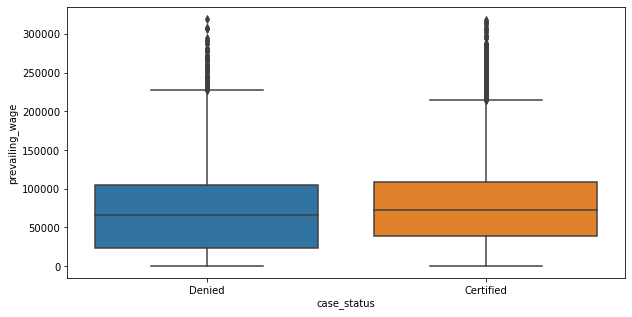

In [119]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="case_status",
    y="prevailing_wage",
)
plt.show

On the average, a highier wage gives a highier chance of having a visa certified

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [120]:
data["case_status"] = data["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0)

In [121]:
wages = {"Hour": 2080, "Week":52, "Month": 12, "Year":1}

data = data.replace(wages)

In [122]:
data["prevailing_wage"] = data["prevailing_wage"].astype('int')
data["unit_of_wage"] = data["unit_of_wage"].astype('int')
data['annual_wage'] = data["unit_of_wage"] * data["prevailing_wage"]
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,annual_wage
0,Asia,High School,N,N,14513,2007,West,592,2080,Y,0,1231360
1,Asia,Master's,Y,N,2412,2002,Northeast,83425,1,Y,1,83425
2,Asia,Bachelor's,N,Y,44444,2008,West,122996,1,Y,0,122996
3,Asia,Bachelor's,N,N,98,1897,West,83434,1,Y,0,83434
4,Africa,Master's,Y,N,1082,2005,South,149907,1,Y,1,149907


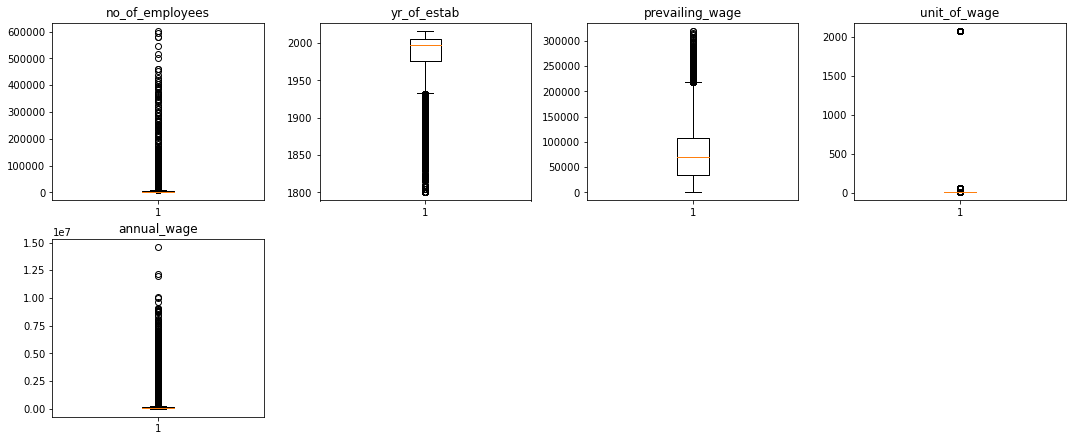

In [123]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("case_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

the outliers appear to be realistic figures so there is no need to treat them

## EDA

- It is a good idea to explore the data once again after manipulating it.

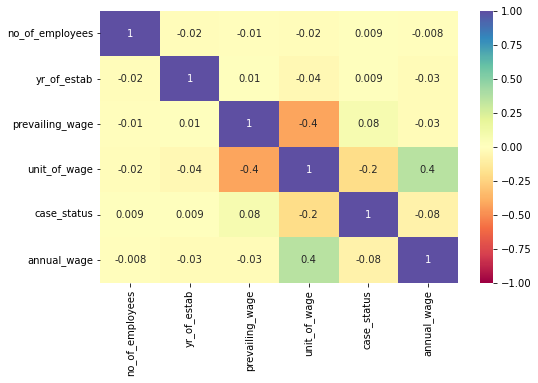

In [124]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

## Building bagging and boosting models

In [126]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1,stratify=y)

In [127]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 20)
Shape of test set :  (7644, 20)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [129]:
def model_performance_classification_sklearn(model, predictors, target):
  
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  

    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [130]:
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.658032  0.740059   0.745903  0.74297


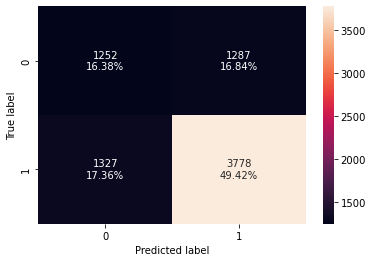

In [131]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

confusion_matrix_sklearn(d_tree,X_test,y_test)

In [132]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_
 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=4,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.658032  0.740059   0.745903  0.74297


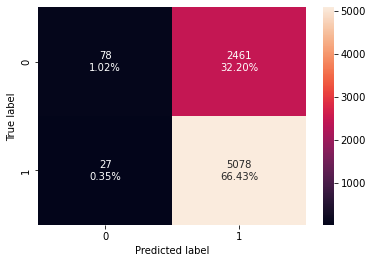

In [133]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724097  0.838198   0.769328  0.802287


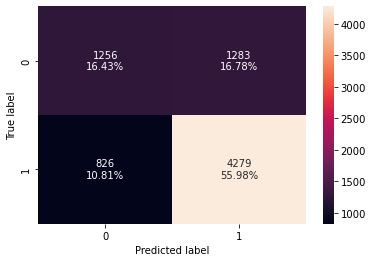

In [134]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [ ]:
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

In [ ]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

confusion_matrix_sklearn(rf_tuned,X_test,y_test)

Bagging

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)
  
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

In [ ]:
models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations